In [98]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


### Import Libraries

In [99]:
import warnings
warnings.filterwarnings("ignore")
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

### Import Dataset

In [100]:
# Load Dataset
iris = datasets.load_iris()

In [101]:
X = iris.data
y = iris.target

In [102]:
df = pd.DataFrame(X, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [103]:
# Instantiate clusters
model = KMeans(n_clusters = 3)

# Fit observations in model
model.fit(X)

# Prediction
labels = model.predict(X)

print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [104]:
pd.DataFrame({"Actual": y, "Predicted": labels})[::10]

,Actual,Predicted
0,0,0
10,0,0
20,0,0
30,0,0
40,0,0
50,1,1
60,1,1
70,1,1
80,1,1
90,1,1


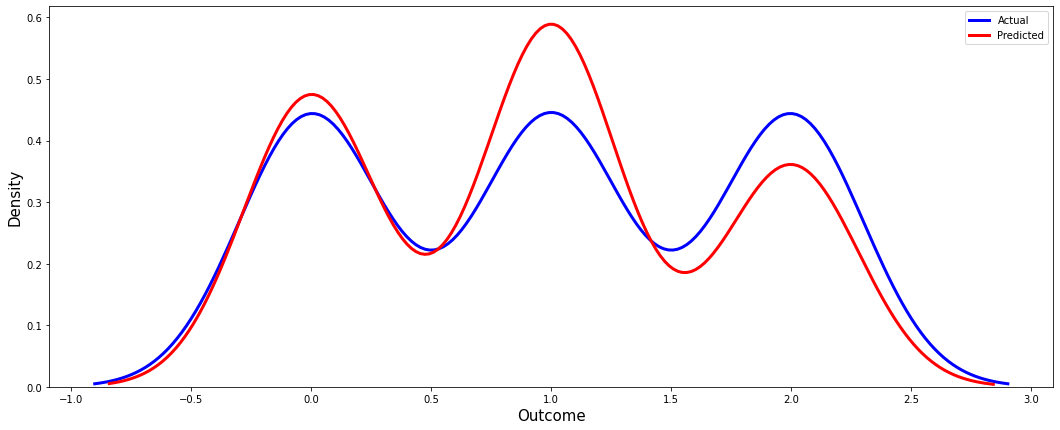

In [105]:
plt.figure(figsize = (18, 7))
sns.kdeplot(data = df, x = y, label = "Actual", linewidth = 3, color = "blue")
sns.kdeplot(x = labels, label = "Predicted", linewidth = 3, color = "red")
plt.xlabel("Outcome", size = 15)
plt.ylabel("Density", size = 15)
plt.legend()
plt.show()

In [106]:
score = accuracy_score(labels, y)
score

0.8933333333333333

**Prediction on unseen data**

In [107]:
new_data = np.array([[5.7, 4.4, 1.5, 0.4],
                     [6.5, 3.0, 5.5, 1.8],
                     [5.8, 2.7, 5.1, 1.9]])

In [108]:
y_pred = model.predict(new_data)
y_pred

array([0, 2, 1])

### Scatter Plots

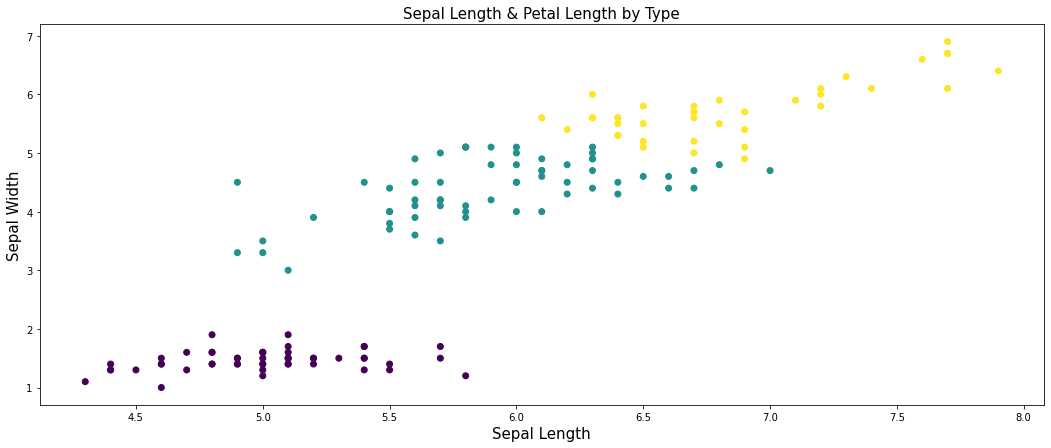

In [109]:
sl = X[:, 0]     # Sepal Length
sw = X[:, 2]     # Sepal Width

plt.figure(figsize = (18, 7))
plt.scatter(sl, sw, c = labels)
plt.title("Sepal Length & Petal Length by Type", size = 15)
plt.xlabel("Sepal Length", size = 15)
plt.ylabel("Sepal Width", size = 15)
plt.show()

### Scatter Plot (Centroid)

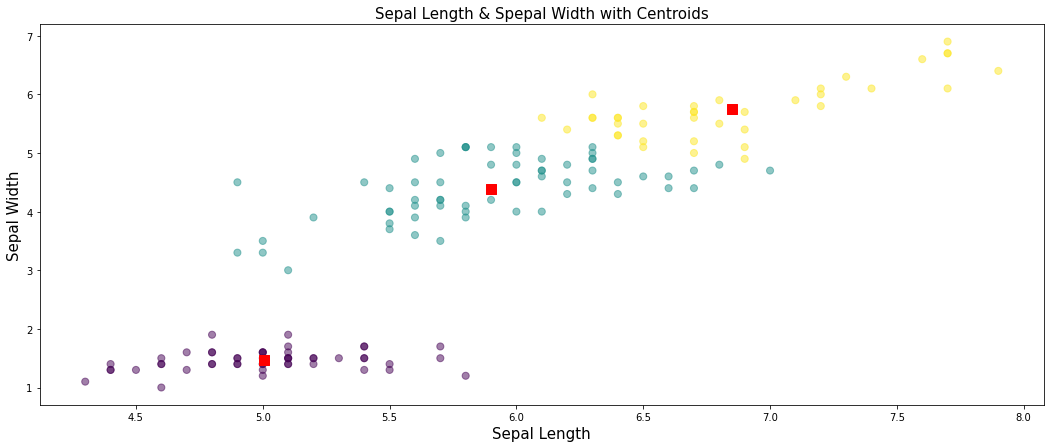

In [110]:
# Assign the columns of X: xs and ys
xs = X[:, 0]      # Sepal Length
ys = X[:, 2]      # Sepal Width

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 2] 

# Make a scatter plot of centroids_x and centroids_y
plt.figure(figsize = (18, 7))
plt.scatter(xs, ys, c = labels, alpha = 0.5, s = 50)
plt.scatter(x = centroids_x, y = centroids_y, marker = ",", color = "red", s = 100)
plt.title("Sepal Length & Spepal Width with Centroids", size = 15)
plt.xlabel("Sepal Length", size = 15)
plt.ylabel("Sepal Width", size = 15)
plt.show()

### Elbow Method to find Best Cluster Value

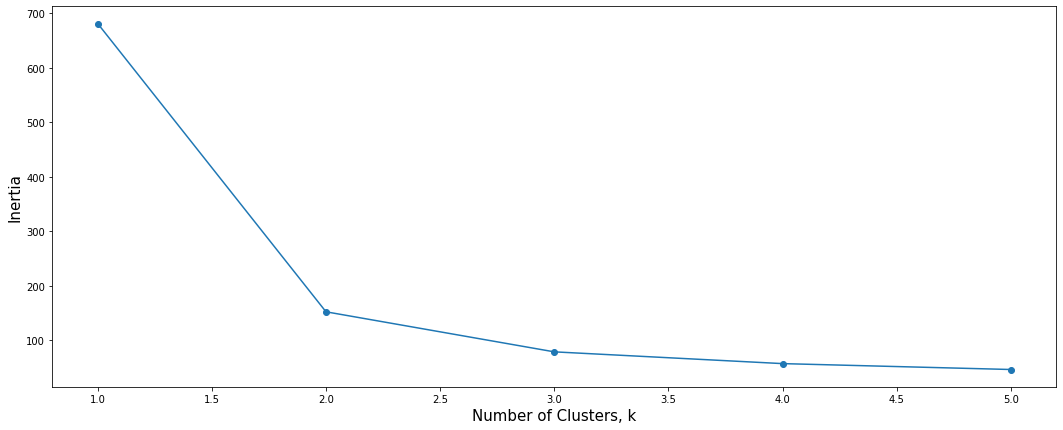

In [111]:
ks = range(1, 6)
inertias = []
for k in ks:
    model = KMeans(n_clusters = k)
    model.fit(X)
    inertias.append(model.inertia_)

plt.figure(figsize = (18, 7))
plt.plot(ks, inertias, "-o")
plt.xlabel("Number of Clusters, k", size = 15)
plt.ylabel("Inertia", size = 15)
plt.show()